In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/supermarket_sales new.csv')

In [47]:
print(data.head())


   Gender   Invoice ID Branch       City Customer type  \
0  Female  750-67-8428      A     Yangon        Member   
1  Female  226-31-3081      C  Naypyitaw        Normal   
2  Female  355-53-5943      A     Yangon        Member   
3  Female  315-22-5665      C  Naypyitaw        Normal   
4  Female  665-32-9167      A     Yangon        Member   

             Product line  Unit price  Quantity   Tax 5%  
0       Health and beauty       74.69         7  261.415  
1  Electronic accessories       15.28         5    3.820  
2  Electronic accessories       68.84         6   20.652  
3      Home and lifestyle       73.56        10   36.780  
4       Health and beauty       36.26         2    3.626  


In [55]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 32
        hiddenLayerNeurons2 = 16
        hiddenLayerNeurons3 = 8
        outLayerNeurons = 6

        self.learning_rate = 0.01
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_H3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_OH = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)

    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI)
        self.hidden_output1 = self.relu(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.relu(hidden_input2)

        hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.relu(hidden_input3)

        output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden_error3 = output_delta.dot(self.W_OH.T) * self.relu(self.hidden_output3, der=True)
        hidden_delta3 = self.learning_rate * hidden_error3

        hidden_error2 = hidden_delta3.dot(self.W_H3.T) * self.relu(self.hidden_output2, der=True)
        hidden_delta2 = self.learning_rate * hidden_error2

        hidden_error1 = hidden_delta2.dot(self.W_H2.T) * self.relu(self.hidden_output1, der=True)
        hidden_delta1 = self.learning_rate * hidden_error1

        self.W_HI += X.T.dot(hidden_delta1)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OH += self.hidden_output3.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)




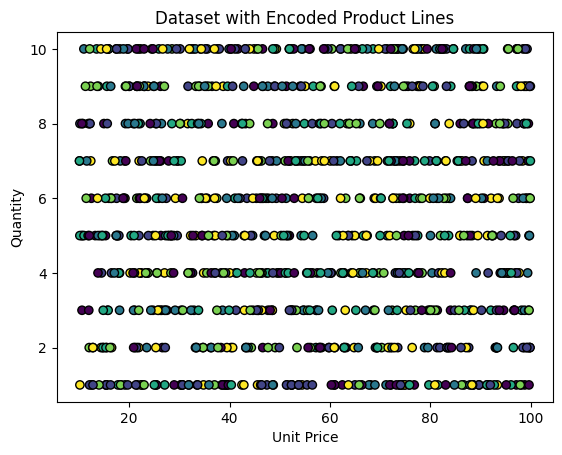

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/My Drive/supermarket_sales new.csv')


X = data[['Unit price', 'Quantity']].values

data['product_encoded'] = data['Product line'].astype('category').cat.codes
Y = data['product_encoded'].values


num_classes = len(np.unique(Y))
Y_one_hot = np.zeros((Y.size, num_classes))
Y_one_hot[np.arange(Y.size), Y] = 1


plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", edgecolor="k")
plt.title("Dataset with Encoded Product Lines")
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.show()


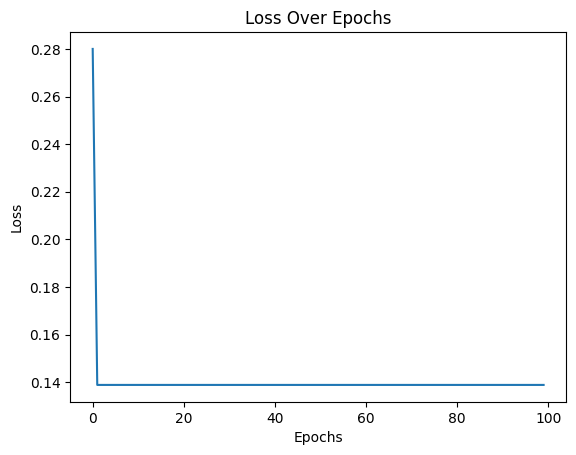

In [57]:
NN = NeuralNetwork()

errors = []
for epoch in range(100):
    output = NN.feedForward(X)
    loss = np.mean(np.square(Y_one_hot - output))
    errors.append(loss)
    NN.train(X, Y_one_hot)

plt.plot(errors)
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

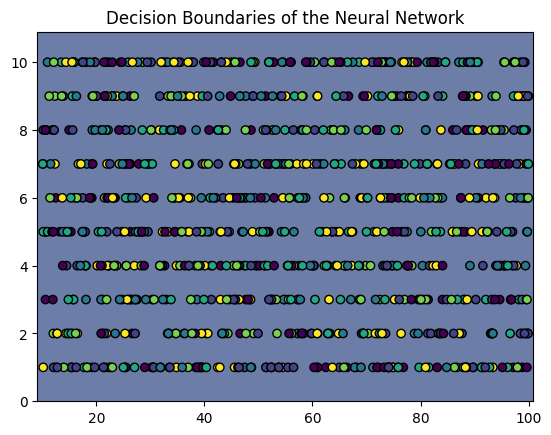

In [58]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = NN.feedForward(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", edgecolor="k")
plt.title("Decision Boundaries of the Neural Network")
plt.show()